# Testing LDA model

In [1]:
# import all libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load test dataset
file_obj = open('test.pkl','rb')
test = pickle.load(file_obj)

In [3]:
test.sample()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
72,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472,2


In [4]:
# seperate input features and labels
x = test.iloc[:,0:13].values
y = test.iloc[:,13].values

In [5]:
x.shape,y.shape

((36, 13), (36,))

In [6]:
# load trainned model
file_obj = open('train.pkl','rb')
classifier = pickle.load(file_obj)
scale_obj = pickle.load(file_obj)
lda =  pickle.load(file_obj)
file_obj.close()

In [7]:
# transform x data 
x = scale_obj.transform(x)

In [8]:
# transform method returns the specified number of principal components.
x = lda.transform(x)

In [9]:
# make prediction using model
prediction = classifier.predict(x)

In [10]:
df = pd.DataFrame({'Actual': y, 'Predicted': prediction})  
df.head()

,Actual,Predicted
0,1,1
1,2,2
2,2,2
3,1,1
4,1,1


In [11]:
cf = confusion_matrix(y,prediction)

In [12]:
cf

array([[ 9,  0,  0],
       [ 0, 18,  0],
       [ 0,  0,  9]])

In [13]:
print(classification_report(y,prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [14]:
# visualization on graph
def visualization(x,y,classifier):
        x1,x2=np.meshgrid(np.arange(start=x[:,0].min()-1,stop=x[:,0].max()+1,step=0.01),np.arange(start=x[:,1].min()-1,stop=x[:,1].max()+1,step=0.01 ))
        plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('yellow','green','pink')))
        
        # limit the age and salary         
        plt.xlim(x1.min(),x1.max())
        plt.ylim(x2.min(),x2.max())
       
        # plots all the datapoints in graph         
        for i,j in enumerate(np.unique(y)):
            plt.scatter(x[y==j,0],x[y==j,1],c=ListedColormap(('red','green','blue'))(i),label=j)

        plt.title('RandomForestClassifier(Training  Set)')
        plt.xlabel('wine ingredients')
        plt.ylabel('customer segment')
        plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


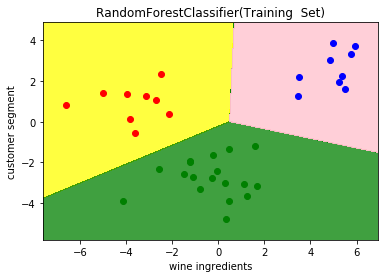

In [15]:
# visualization of train data
visualization(x,y,classifier)

In [16]:
print('Test Accuracy :',accuracy_score(y,prediction)*100)

Test Accuracy : 100.0
